In [154]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# Lab Round 2

In [92]:
#1 Reading the CSV file as DataFrame and showing its shape

customers = pd.read_csv('marketing_customer_analysis.csv')
display(customers.head())
display(customers.shape)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


(10910, 26)

In [93]:
#Show column names and types

customers.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [94]:
column_names = customers.columns
display(column_names)

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [95]:
#dropping Unnamed: 0 column
customers = customers.drop(['Unnamed: 0'], axis=1)
customers.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [96]:
#2 Standardizing column names

cols1=[]
for c in customers.columns:
    cols1.append(c.lower())
customers.columns=cols1

In [97]:
#3 Checking for Numerical Data Types
num_col = []
num_col.append(customers.dtypes[customers.dtypes == np.float64])
display(num_col)

[customer lifetime value      float64
 months since last claim      float64
 number of open complaints    float64
 total claim amount           float64
 dtype: object]

In [98]:
#4 Checking for Categorical Data Types
cat_col = []
cat_col.append(customers.dtypes[customers.dtypes == np.object])
display(cat_col)

C:\Users\ACER\AppData\Local\Temp\ipykernel_20072\3276978197.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_col.append(customers.dtypes[customers.dtypes == np.object])


[customer             object
 state                object
 response             object
 coverage             object
 education            object
 effective to date    object
 employmentstatus     object
 gender               object
 location code        object
 marital status       object
 policy type          object
 policy               object
 renew offer type     object
 sales channel        object
 vehicle class        object
 vehicle size         object
 vehicle type         object
 dtype: object]

In [99]:
#5 Finding number of nulls for each column

customers.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [100]:
#5 Find Percentage Null Per Column

round(customers.isna().sum()/len(customers),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(customers.isna().sum()/len(customers),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [101]:
#5.1 Finding the values and Freq of the vehicle type column

customers['vehicle type'].value_counts(dropna=False)

NaN    5482
A      5428
Name: vehicle type, dtype: int64

In [102]:
#5.1 Replacing Null Vehicle Types with M for Manual

customers['vehicle type'] = customers['vehicle type'].fillna('M')

In [103]:
#5.2 use most common value (Mode) to fill Na in state

customers['state'] = customers['state'].fillna(customers['state'].value_counts(dropna=True).index[0])

In [104]:
#5.3 Checking response rows with null values

customers['response'].value_counts(dropna=False)

No     8813
Yes    1466
NaN     631
Name: response, dtype: int64

In [105]:
#5.3 use most common value (Mode) to fill Na in response

customers['response'] = customers['response'].fillna(customers['response'].value_counts(dropna=True).index[0])

In [106]:
#5 Checking Months Since Last Claim rows with null values and filling NA with the median value

median_mslc = customers['months since last claim'].median()
median_mslc
customers['months since last claim'] = customers['months since last claim'].fillna(median_mslc)

In [107]:
#5 Checking Open Complains rows with null values and filling NA with the median value

median_oc = customers['number of open complaints'].median()
median_oc
#customers['number of open complaints'] = customers['number of open complaints'].fillna(median_oc)

0.0

In [108]:
#5 Replacing Vehicle Class NA rows with the mode value

customers['vehicle class'] = customers['vehicle class'].fillna(customers['vehicle class'].value_counts(dropna=True).index[0])

In [109]:
#5 Replacing Vehicle Size NA rows with the mode value

customers['vehicle size'] = customers['vehicle size'].fillna(customers['vehicle size'].value_counts(dropna=True).index[0])

In [110]:
# Find Percentage Null Per Column after substituting the null values in some columns

round(customers.isna().sum()/len(customers),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(customers.isna().sum()/len(customers),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.0
1,state,0.0
2,customer lifetime value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective to date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [129]:
#6 Changing the Effective to date to Date format and extract month from it in a separate column

customers['effective to date'] = pd.to_datetime(customers['effective to date'])

In [134]:
#6 Extracting Month from Eff to Date Column and adding to the end of the Data Frame

customers['effective to Month'] = pd.DatetimeIndex(customers['effective to date']).month

customers.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,etd,effective to Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2/18/11,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1/18/11,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2/10/11,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1/11/11,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1/17/11,1


In [136]:
#6 Selecting only Data in the first quarter of the year

customers[customers['effective to Month'].isin([1,2,3])]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,etd,effective to Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2/18/11,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1/18/11,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2/10/11,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1/11/11,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1/17/11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1/19/11,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1/6/11,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2/6/11,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2/13/11,2


Lab Round 3

In [147]:
# 1 Show the Data Frame Info

display(customers.shape)
display(customers.head())
customers.info

(10910, 27)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,etd,effective to Month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2/18/11,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1/18/11,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2/10/11,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1/11/11,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1/17/11,1


<bound method DataFrame.info of       customer       state  customer lifetime value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877  California              6857.519928       No     Basic   

      education effective to date employmentstatus gender  income  ...  \
0    

In [142]:
#2 Descripe the Data Frame

customers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,15.082401,9.787208,0.000000,7.000000,14.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
effective to Month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


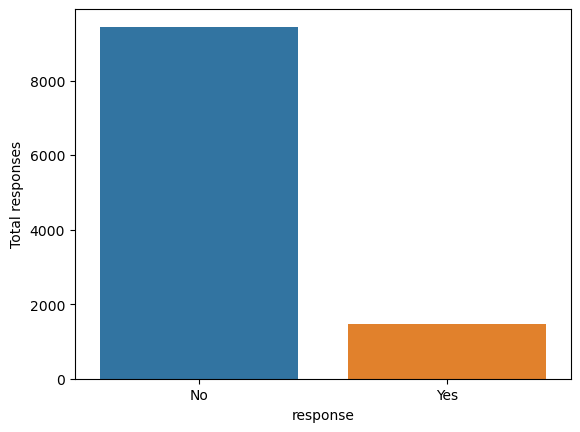

In [148]:
#Show a plot of the total number of responses.

sns.countplot(x="response", data=customers)
plt.ylabel('Total responses')
plt.show()

In [149]:
#Show a plot of the response rate by the sales channel

# Calculate response rate

customers['response_rate'] = np.where(customers.response == 'Yes', 1 ,0) 

<AxesSubplot:xlabel='sales channel', ylabel='response_rate'>

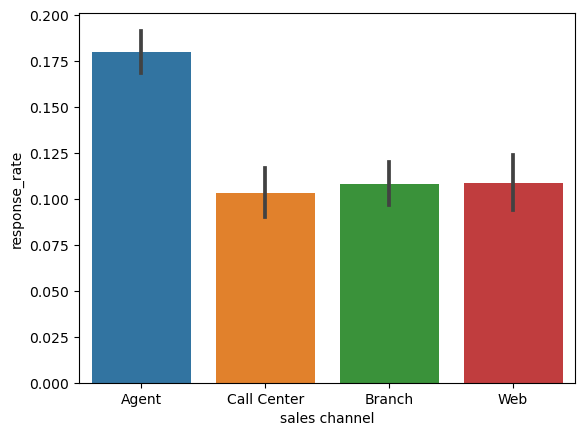

In [151]:
# Plot Response Rate by Sales Channel

sns.barplot(x= 'sales channel', y = 'response_rate', data = customers)

In [157]:
# Creating groups for total claim amount

customers['total_claim_bins'] = pd.qcut(customers['total claim amount'], q = 4, duplicates = 'drop')

<AxesSubplot:xlabel='response_rate', ylabel='total_claim_bins'>

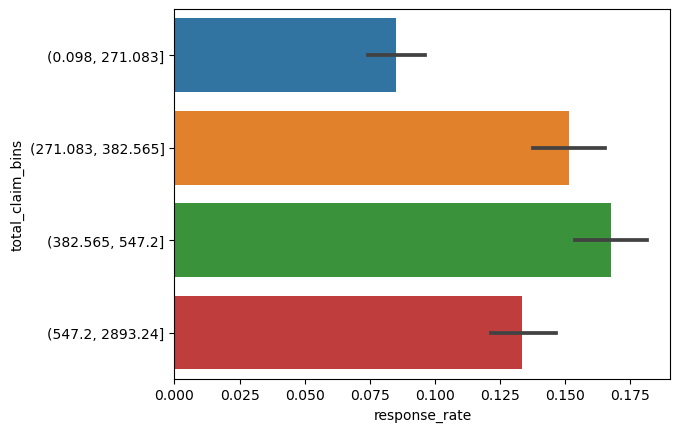

In [163]:
# Plot Response Rate by Total Claim Amount

sns.barplot(y= 'total_claim_bins', x = 'response_rate', data = customers)

In [159]:
# Creating groups for total income

customers['total_income_bins'] = pd.qcut(customers['total claim amount'], q = 8, duplicates = 'drop')

<AxesSubplot:xlabel='response_rate', ylabel='total_income_bins'>

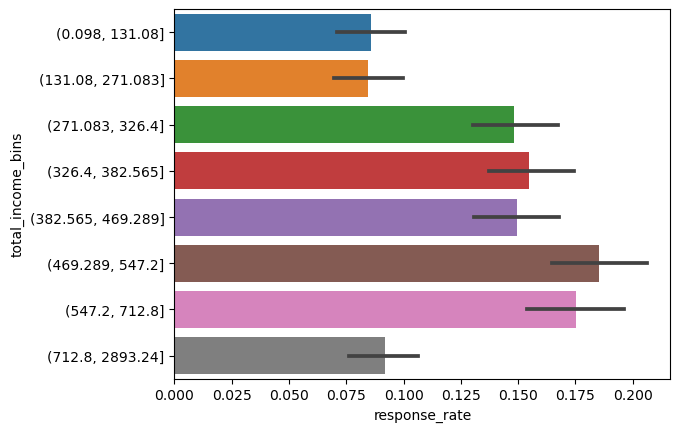

In [162]:
# Plot Response Rate by Income

sns.barplot(y= 'total_income_bins', x = 'response_rate', data = customers)